# Trading Strategies Based on Genetic Algorithms
## Learning sessions results analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 8
%matplotlib inline

In [2]:
base_path = '/run/media/jjd/Win7/Users/jjd/Desktop/GAExperiment_2017-05-28_0211/'

### Fitness by Generations
The genetic algorithm ran for 32 generations. The session was ending after a  fitness stagnation for 9 generation.

The paper uses Sterling ratio as fitness:
$$SterlingRatio = \frac{NetProfit}{MaxDrawdown}$$
In order to avoid negative fitness issues, this study used:
$$fitness = 2^{SterlingRatio}$$

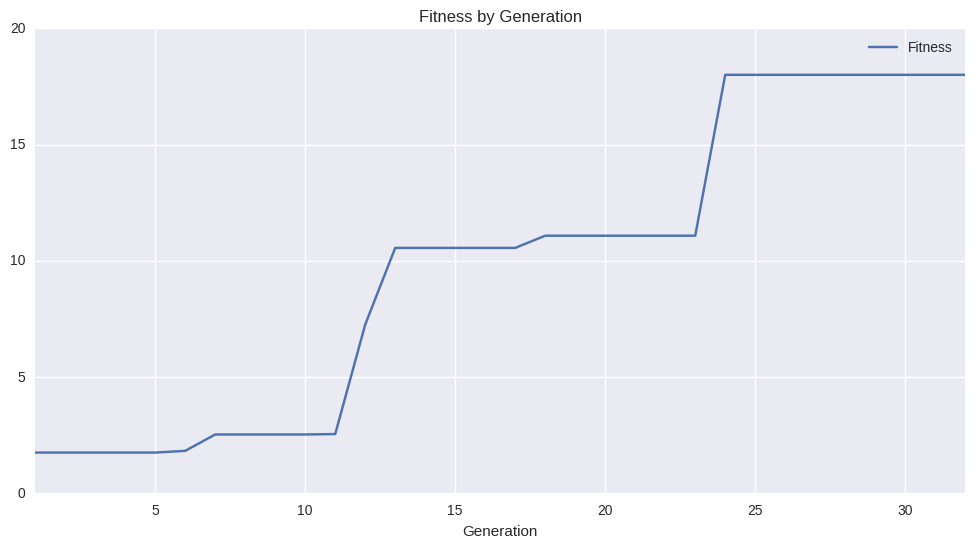

In [3]:
fitness_by_generation_file = base_path + 'FitnessByGeneration.csv' 
fitness_by_generation = pd.read_csv(fitness_by_generation_file)
fitness_by_generation.plot(x='Generation', y='Fitness', title='Fitness by Generation', figsize=(12,6));

The fitness shows a typical pattern in genetic algorithms, that is, many generations of fitness stagnation until a new innovation reaches new highs.

Read the data of all individual generated by the genetic algorithm and apply CamleCase format for the column names.

In [4]:
optimization_resutls = base_path + 'ResultsNoUnits.csv'
out_of_sample_results = base_path + 'OutOfSampleBacktests/FullResutlsNoUnits.csv'

In [5]:
ga_results = pd.read_csv(optimization_resutls, )
camel_column_name = [n.replace(" ", "") for n in ga_results.columns]
ga_results.columns = camel_column_name

The simple order in which the backtest results were saved will be used as individuals identification for further comparison.

In [6]:
ga_results['ID'] = ga_results.index

The number of individuals tested in the learning session was **1873**.

In [7]:
ga_results['SterlingRatio'] = ga_results.NetProfit/ga_results.Drawdown

In [8]:
ga_results['Fitness'] = 2 ** ga_results.SterlingRatio

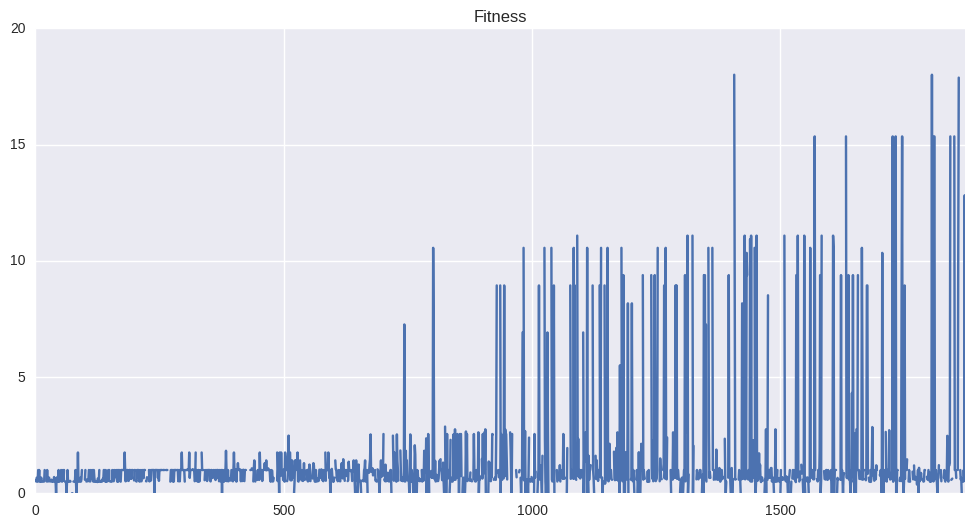

In [9]:
ga_results.Fitness.plot(figsize=(12,6), grid=True, title='Fitness');

In [10]:
ga_results.shape[0]

1873

However, not all the individuals were able to generate signals, in those cases, the **`TotalTrades`** are equal to zero. Those cases are discarded for further analysis.

In [11]:
ga_results[ga_results.TotalTrades==0].shape[0]

249